In [1]:
"""Building correspondence between VCs"""
import os, sys
from numpy.core.fromnumeric import resize, shape

from torchvision import models
p = os.path.abspath('.')
sys.path.insert(1, p)
from joblib import Parallel, delayed
from scipy.spatial.distance import cdist
# from Initialization_Code.vcdist_funcs import vc_dis_paral, vc_dis_paral_full
# import time
import pickle
# from Initialization_Code.config_initialization import vc_num, dataset, categories, data_path, \
#     cat_test, device_ids, Astride, Apad, Arf, vMF_kappa, layer, init_path, \
#     dict_dir, sim_dir, extractor, da_sim_dir, da_dict_dir
# from Code.helpers import getImg, imgLoader, Imgset, myresize
from torch.utils.data import DataLoader
import numpy as np
# import math
# import torch
import matplotlib.pyplot as plt
import cv2
from sklearn.decomposition import PCA as sklearnPCA

In [2]:
dict_dir = '../models/FINAL/init_vgg_tr/dictionary_vgg_tr/'
# da_dict_dir1 = '../models/da_init_vgg_tr_reg05/dictionary_vgg_tr/'
# da_dict_dir2 = '../models/da_init_vgg_tr_reg3/dictionary_vgg_tr/'
# da_dict_dir3 = '../models/da_init_vgg_tr/dictionary_vgg_tr/'
layer = 'pool5'
vc_num = 512
print(dict_dir)
paths = ['../models/da_init_vgg_tr_reg05/dictionary_vgg_tr/', '../models/da_init_vgg_tr_reg3/dictionary_vgg_tr/',\
    '../models/da_init_vgg_tr_regadapt/dictionary_vgg_tr/', '../models/da_init_vgg_tr_reg1/dictionary_vgg_tr/',\
        '../models/da_init_vgg_tr_reg0/dictionary_vgg_tr/']
labels = ['0.5', '0.3', 'adaptive', '1', '0.01']
centers = []
for pt in paths:
    with open(pt+'dictionary_{}_{}.pickle'.format(layer, vc_num), 'rb') as fh:
        centers.append(pickle.load(fh))

# with open(da_dict_dir2+'dictionary_{}_{}.pickle'.format(layer, vc_num), 'rb') as fh:
#     centers_cor2 = pickle.load(fh)
# with open(da_dict_dir3+'dictionary_{}_{}.pickle'.format(layer, vc_num), 'rb') as fh:
#     centers_cor3 = pickle.load(fh)
print("Loading clean Vmf Kernels")
with open(dict_dir+'dictionary_{}_{}.pickle'.format(layer, vc_num), 'rb') as fh:
    centers_cln = pickle.load(fh)
print(centers_cln.shape, centers[0].shape)

../models/FINAL/init_vgg_tr/dictionary_vgg_tr/
Loading clean Vmf Kernels
(512, 512) (512, 512)


In [17]:
# plt.imshow(davc_pca)
# plt.show()
# np.min(davc_pca)

In [3]:
r_set = []
for c in centers:
    r_set.append(cdist(centers_cln, c, 'cosine'))
# r_set2 = cdist(centers_cln, centers_cor2, 'cosine')
# r_set3 = cdist(centers_cln, centers_cor3, 'cosine')

In [4]:
values = []
for r in r_set:
    values.append(r.diagonal())
# values2 = r_set2.diagonal()
# values3 = r_set3.diagonal()

In [5]:
values[0].shape

(512,)

In [12]:
# for v in values[0]:
#     print(v)
# t = np.argsort(values[1])
# vs = np.sort(values[1])
# for k,v in zip(t,vs):
#     print(k,":",v)

411 : 1.2023466877675304e-07
475 : 0.015105522511967173
45 : 0.018742279679676344
357 : 0.018874445435804077
325 : 0.019013829831500795
431 : 0.019309093914848363
484 : 0.020526842348552843
175 : 0.02073448234752251
395 : 0.02254318675230671
490 : 0.02315797493834648
138 : 0.023552844142022855
314 : 0.026513147092780076
390 : 0.028118336957981827
426 : 0.030358063949736835
17 : 0.03110166015443605
498 : 0.031307641811368025
477 : 0.03207889654502638
440 : 0.03319868084337352
216 : 0.03735907097399194
409 : 0.03898872498441408
312 : 0.04547333981119306
0 : 0.045983378273657616
271 : 0.04961851117806815
455 : 0.05235004419082123
374 : 0.054664736248268175
88 : 0.05820511113447446
304 : 0.058572163338963756
273 : 0.06056715233343024
82 : 0.06292889237326826
366 : 0.0636198294870336
187 : 0.06393529331606285
256 : 0.0686208094569698
406 : 0.07016117921838749
444 : 0.07027155928616957
422 : 0.07069397164829216
371 : 0.07109077287185717
121 : 0.07116695293311937
203 : 0.07219011462808955
142

In [10]:
np.mean(values[1]<0.1)

0.095703125

Text(0, 0.5, 'vector number')

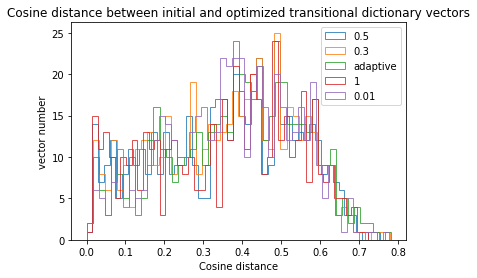

In [12]:
for v, lb in zip(values, labels):
    _ = plt.hist(v, bins=50, alpha=0.8, label=lb, histtype='step')
# _ = plt.hist(values1, bins=50, alpha=0.8, label='0.5', histtype='step')
# _ = plt.hist(values2, bins=50, alpha=0.8, label='0.3', histtype='step')
plt.legend(loc='upper right')
plt.title('Cosine distance between initial and optimized transitional dictionary vectors')
plt.xlabel('Cosine distance')
plt.ylabel('vector number')

Text(0, 0.5, 'vector number')

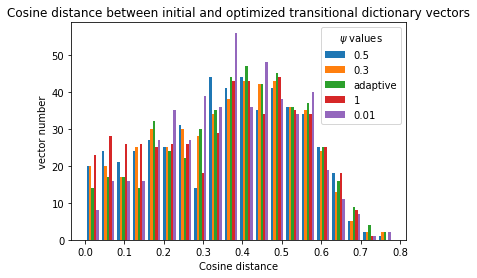

In [13]:
_ = plt.hist(values, bins='auto', label=labels, histtype='bar')
plt.legend(loc='upper right', title=r'$\psi$'' values')
plt.title('Cosine distance between initial and optimized transitional dictionary vectors')
plt.xlabel('Cosine distance')
plt.ylabel('vector number')

In [15]:
np.where(values[0]<0.05)

(array([  0,  17,  45, 138, 175, 187, 216, 271, 312, 314, 325, 357, 390,
        395, 409, 411, 426, 431, 440, 455, 475, 477, 484, 490, 498]),)

In [19]:
values[0]

array([4.58048167e-02, 3.99419194e-01, 3.37024204e-01, 3.17862093e-01,
       4.44092461e-01, 2.63103275e-01, 1.14227026e-01, 4.74756961e-01,
       1.19679500e-01, 4.37930599e-01, 4.33429934e-01, 4.48541834e-01,
       2.42963464e-01, 6.04209311e-01, 4.15664179e-01, 5.09628083e-01,
       1.12171931e-01, 3.14756332e-02, 6.34452851e-01, 3.12927750e-01,
       4.91264039e-01, 2.62156911e-01, 1.89000926e-01, 1.36290170e-01,
       2.70495006e-01, 3.02493701e-01, 1.71631231e-01, 2.33901405e-01,
       5.20515023e-01, 6.70471557e-01, 2.03980346e-01, 2.35523187e-01,
       2.43386632e-01, 5.07085806e-01, 1.28241838e-01, 4.80252749e-01,
       3.34954624e-01, 3.59330048e-01, 4.12842474e-01, 6.36104086e-01,
       1.78654125e-01, 4.77655059e-01, 5.93295044e-01, 5.56222539e-01,
       3.45622958e-01, 1.83945044e-02, 2.17980444e-01, 6.32450033e-01,
       4.90219647e-01, 4.09768143e-01, 4.39724128e-01, 1.42545936e-01,
       6.16595352e-01, 2.25040702e-01, 3.47496104e-01, 3.44733201e-01,
      